In [1]:
import numpy as np
import matplotlib.pyplot as plt

import scipy.stats as sts

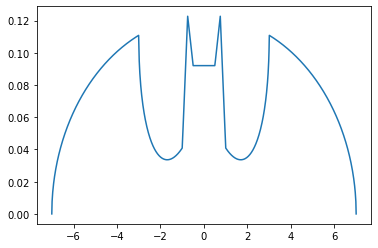

In [2]:
def f(x):
    Z = 24.44321494051954
    if abs(x) > 7:
        return 0
    elif abs(x) > 3:
        return 3*(1 - (x/7)**2)**0.5 / Z
    elif abs(x) > 1:
        return (
            (3 - abs(x))/2 - 3/7 * 10**0.5 * ((3 - x**2 + 2*abs(x))**0.5 - 2)
        ) / Z
    elif abs(x) > 0.75:
        return (9 - 8*abs(x))/Z
    elif abs(x) > 0.5:
        return (3*abs(x) + 0.75) / Z   
    else:
        return 2.25/Z

x = np.linspace(-7,7,1000)
vec_f = np.vectorize(f)

plt.plot(x, vec_f(x))

In [4]:
dist = []

# Starting parameter
current = 1
for i in range(100000):
    # Make a proposal
    proposal = sts.norm(current, 2).rvs()
    accept = np.random.random() < min(1, f(proposal)/f(current))

    if accept: 
        current = proposal

    if i%100 == 0:
        dist.append(current)


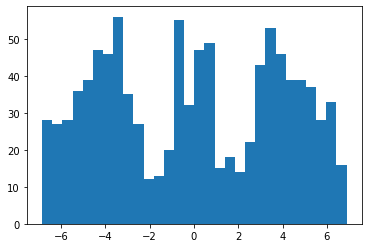

In [6]:
d = plt.hist(dist, bins = 30)

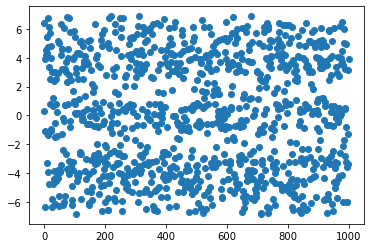

In [8]:
plt.scatter(range(len(dist)), dist)